<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sklearn

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
centers=3

In [21]:
# Step 1: Generate a synthetic dataset
X, y = make_blobs(n_samples=3000, centers=centers, random_state=42, cluster_std=3.5)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Convert the dataset into a pandas DataFrame
# Adding feature columns
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Adding the target variable
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())


   Feature_1  Feature_2  Target
0  -5.174059  -3.128355       2
1  -2.355857   8.499779       0
2  -7.293273   8.227607       0
3  -1.244313  14.397414       0
4  -2.042867   6.587228       1


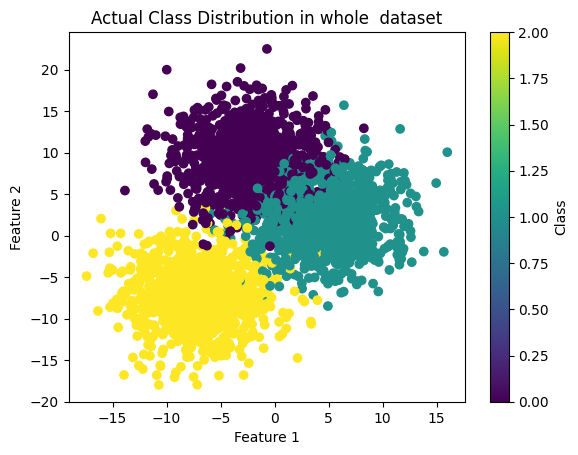

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Class Distribution in whole  dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()

In [25]:
# Step 2: Define the softmax function
def softmax(z):
    if z.ndim == 1:
        z = z.reshape(1, -1)
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [30]:
#Step 3: Implement a simple model for softmax regression
#This has been modifed to keep a history of the value of the loss function
# and the entries of W and B, so these are being stored. If this were be used with many epochs, might be best to comment out
# the line for "Store the weights and bias"

class SoftmaxRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.weights_history = []
        self.bias_history = []
        self.losses = []

    def fit(self, X, y, n_classes, lr=0.01, epochs=1000):
        m, n_features = X.shape
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for _ in range(epochs):
            scores = np.dot(X, self.weights) + self.bias
            probabilities = softmax(scores)

            # Compute the loss
            y_one_hot = np.eye(n_classes)[y]
            loss = -np.mean(np.sum(y_one_hot * np.log(probabilities), axis=1))
            self.losses.append(loss)

            # Compute the gradient
            y_one_hot = np.eye(n_classes)[y]
            dw = np.dot(X.T, (probabilities - y_one_hot)) / m
            db = np.sum(probabilities - y_one_hot, axis=0) / m

            # Update the weights and bias
            self.weights -= lr * dw
            self.bias -= lr * db

            # Store the weights and bias
            self.weights_history.append(self.weights.flatten().tolist())
            self.bias_history.append(self.bias.tolist())

    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probabilities = softmax(scores)
        return np.argmax(probabilities, axis=1)



Accuracy: 0.9188888888888889


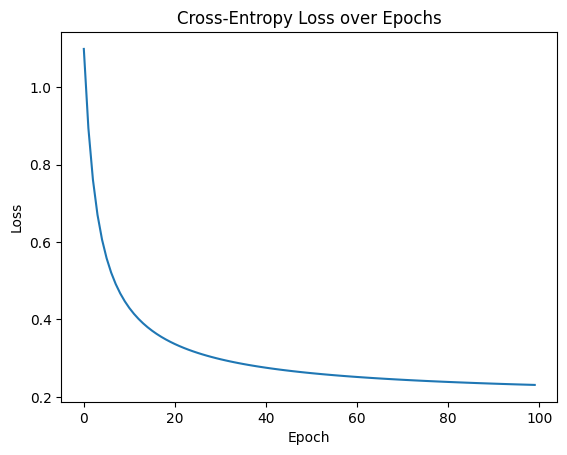

In [31]:
# Step 4: Train the model
model = SoftmaxRegression()
model.fit(X_train, y_train, n_classes=centers,epochs=100)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optional Plot the loss
plt.plot(model.losses)
plt.title('Cross-Entropy Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()




In [43]:
# Create a DataFrame for weights and bias history
weights_df = pd.DataFrame(model.weights_history, columns=[f'W{i}' for i in range(1, 7)])
bias_df = pd.DataFrame(model.bias_history, columns=[f'B{i}' for i in range(1, 4)])
weights_bias_df = pd.concat([weights_df, bias_df], axis=1)
weights_df
# weights_bias_df

,W1,W2,W3,W4,W5,W6
0,-0.002245,0.020502,-0.018258,0.026389,0.001942,-0.028332
1,-0.005333,0.038289,-0.032957,0.047519,0.002784,-0.050303
2,-0.008898,0.053781,-0.044883,0.064535,0.003096,-0.067630
3,-0.012660,0.067459,-0.054799,0.078494,0.003205,-0.081699
4,-0.016452,0.079710,-0.063257,0.090185,0.003266,-0.093451
...,...,...,...,...,...,...
95,-0.127681,0.362223,-0.234542,0.258728,0.019906,-0.278634
96,-0.128069,0.363399,-0.235330,0.259329,0.019979,-0.279308
97,-0.128451,0.364562,-0.236111,0.259923,0.020051,-0.279974
98,-0.128828,0.365711,-0.236883,0.260511,0.020121,-0.280633


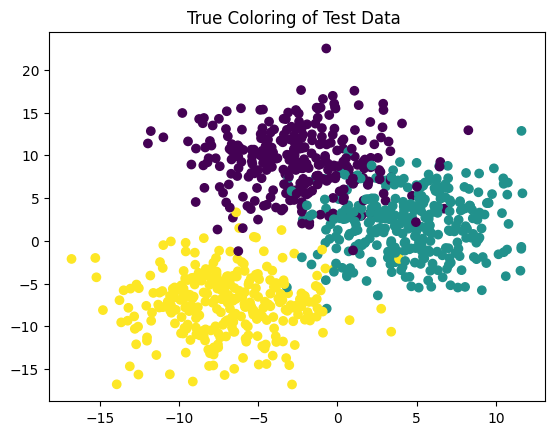

In [ ]:
# Optional: Plotting the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("True Coloring of Test Data ")
plt.show()

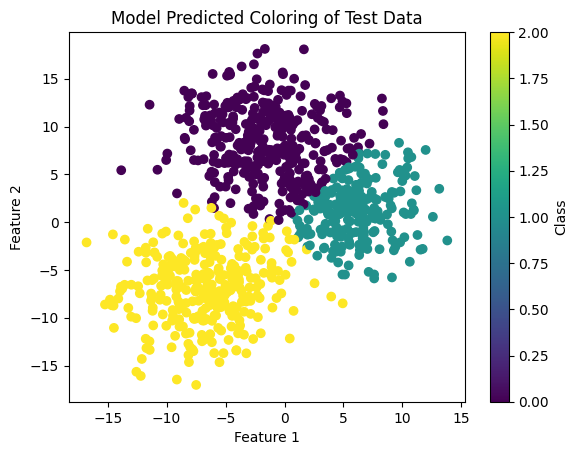

In [ ]:
#Assuming X_test and y_test are already defined from the previous code
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Model Predicted Coloring of Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class')
plt.show()


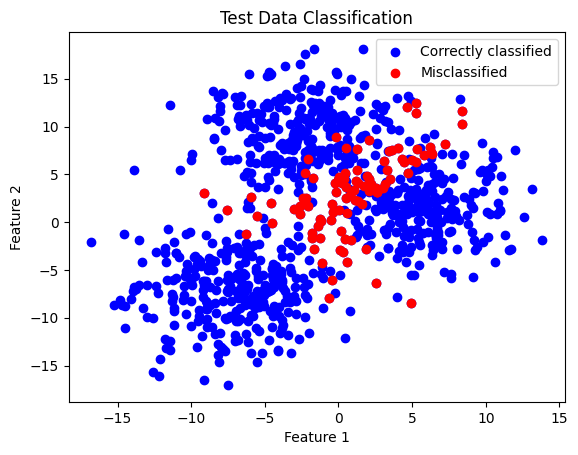

In [ ]:
# Assuming y (true labels) and y_pred (predicted labels) are already defined in the notebook
# Identify the indices where y_pred differs from y
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]


# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Correctly classified')
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data Classification')
plt.legend()
plt.show()



In [ ]:
W=model.weights
B=model.bias
print(W)
print(B)

[[-0.01854905  0.08004783 -0.06149878]
 [ 0.08772168  0.00564037 -0.09336205]]
[-0.0014195   0.00195979 -0.00054029]


In [ ]:
Z = np.dot(X, W) + B
# Apply softmax
softmax_values = softmax(Z)

# Adding softmax values as new columns to the DataFrame
df['Softmax_1'] = softmax_values[:, 0]
df['Softmax_2'] = softmax_values[:, 1]
df['Softmax_3'] = softmax_values[:, 2]

def set_target_flags(row):
    # Initialize all flags to 0
    flags = [0, 0, 0]
    # Set the flag corresponding to the target value to 1
    flags[int(row['Target'])] = 1
    return pd.Series(flags)

df[['y-hot0', 'y-hot1', 'y-hot2']] = df.apply(set_target_flags, axis=1)


def get_softmax_value(row):
    target = int(row['Target'])
    return row[f'Softmax_{target + 1}']

# Apply the function to each row
df['prob'] = df.apply(get_softmax_value, axis=1)

df['-log(prob)'] = -np.log(df['prob'])

df

,Feature_1,Feature_2,Target,Softmax_1,Softmax_2,Softmax_3,y-hot0,y-hot1,y-hot2,prob,-log(prob)
0,-5.174059,-3.128355,2,0.251173,0.195616,0.553211,0,0,1,0.553211,0.592016
1,-2.355857,8.499779,0,0.612174,0.242365,0.145461,1,0,0,0.612174,0.490738
2,-7.293273,8.227607,0,0.642097,0.159763,0.198140,1,0,0,0.642097,0.443017
3,-1.244313,14.397414,0,0.740684,0.201645,0.057671,1,0,0,0.740684,0.300182
4,-2.042867,6.587228,1,0.552734,0.264052,0.183214,0,1,0,0.264052,1.331609
...,...,...,...,...,...,...,...,...,...,...,...
2995,-4.642490,8.359887,0,0.629523,0.201224,0.169253,1,0,0,0.629523,0.462793
2996,-12.026341,-11.299804,2,0.067761,0.052516,0.879723,0,0,1,0.879723,0.128148
2997,-6.369200,-4.831562,2,0.201928,0.160756,0.637315,0,0,1,0.637315,0.450491
2998,-7.581865,-5.593823,2,0.179565,0.135033,0.685402,0,0,1,0.685402,0.377749


The objective is to adjust W and B so that he column sum of H is minimized.

---



Loss function.  $J(W,B)=J(w1,w2,.., b1, b2,...)$

Cross entropy $H(X)=-\log(p_i)$ where $p_i$ is the component of $\hbox{softmax}(WX+B)$ that corresponds to the index of the label of X.

$J(W,B)=\sum_X H(X)$

# Noodling with the differentiation needed for training the model. It's the magic in Step 3 above

In [ ]:
from sympy import symbols, Matrix, exp, Sum, diff, latex

# Define the symbols for the matrix entries and the vector entries
w1, w2, w3, w4, w5, w6, b1, b2, b3, x1, x2 = symbols('w1 w2 w3 w4 w5 w6 b1 b2 b3 x1 x2')

# Create the symbolic matrix W and vector X
W = Matrix([[w1, w2], [w3, w4], [w5, w6]])
X = Matrix([x1, x2])
B = Matrix([b1,b2,b3])

# Compute the product Z = WX+B
Z = W * X+B

# Extract elements from Z for the softmax function
z1, z2, z3 = Z

# Softmax components
# softmax_components = [exp(z1)/(exp(z1) + exp(z2) + exp(z3)),
#                        exp(z2)/(exp(z1) + exp(z2) + exp(z3)),
#                        exp(z3)/(exp(z1) + exp(z2) + exp(z3))]

# # Create the softmax vector sigma(Z)
# sigma_Z = Matrix(softmax_components)

# # Display sigma(Z)
# sigma_Z
Z

Matrix([
[b1 + w1*x1 + w2*x2],
[b2 + w3*x1 + w4*x2],
[b3 + w5*x1 + w6*x2]])

In [ ]:
Z

Matrix([
[b1 + w1*x1 + w2*x2],
[b2 + w3*x1 + w4*x2],
[b3 + w5*x1 + w6*x2]])

We need to get our hands on $$\frac{\partial J}{\partial w_c}$$

By the chain rule we have $$\frac{\partial J}{\partial w_c}=\frac{\partial J}{\partial z_c}\frac{\partial z_c}{\partial w_c}$$

Notice the partial derivative of Z with respect to one of the weights $w_j$ is equal to $x_1$ or $x_2$

Written in a vector form

$$\frac{\partial z_c}{\partial w_c}=X$$

We also need $\displaystyle{\frac{\partial J}{\partial z_c}}$



$$\frac{\partial J}{\partial z_c}=-\frac{\partial\log(\sigma_c)}{\partial z_c} =-\frac{1}{\sigma_c}\frac{\partial \sigma_c}{\partial z_c}=-\frac{1}{\sigma_c}\frac{\partial}{\partial z_c}\left(\frac{e^{z_c}}{\sum_k e^{z_k}}\right)=-\frac{1}{\sigma_c}\frac{e^{z_c}\lambda- e^{z_c}e^{z_c}}{\lambda^2}=-\frac{\sigma_c-\sigma_c^2}{\sigma_c}=\sigma_c-1$$

Putting this all together we get

$$\frac{\partial J}{\partial w_c}=X\cdot(p_c-y_c)$$ where we use one-hot coding notation for the labels.

(The other probability distribution in the cross-entropy with softmax $\sigma$ is the strings of 0s and 1 corresponding to the labels,

 so $y_j=1$ if $j=c$ and $y_j=0$ otherwise.)

 Now look back to Step #3 above and focus on the part where the gradient is coded:

            y_one_hot = np.eye(n_classes)[y]
            dw = np.dot(X.T, (probabilities - y_one_hot)) / m
            db = np.sum(probabilities - y_one_hot, axis=0) / m

Note that X.T simply means "transpose" of X.

So indeed, dw is the gradient of J with the differentiation variables from the matrix W. This gradient is written in matrix form instead of listing out the components in a row vector are we might do in Calc 3.

The X is dw is actually a batch of feature vectors. Look back to Step #1.
Setting all this up as matrix multiplications means that the calculations can be parallelized. GPUs to the rescue!

# Iris flower dataset
[Wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
#iris

In [ ]:
import seaborn as sns
from sklearn import datasets

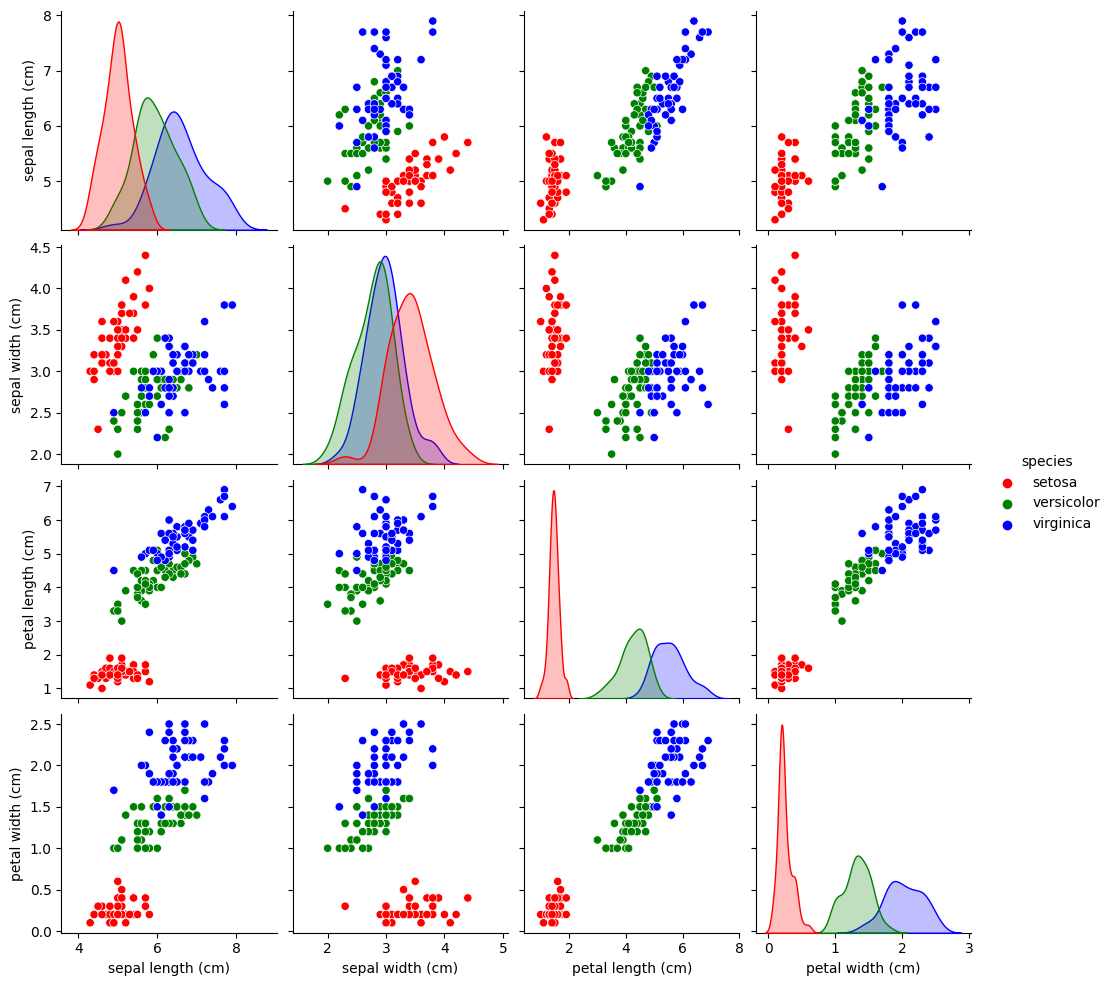

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column to the dataframe
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pairplot using seaborn
sns.pairplot(iris_df, hue="species", palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'})


**Let's focus on [sepal length, sepal width]**

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

# Extracting sepal length and sepal width
X = iris.data[:, :2]  # This selects all rows and the first two columns (sepal length and width)

# The target (species)
y = iris.target

# If you want to convert the numerical labels of the species into their corresponding names
species = pd.Categorical.from_codes(iris.target, iris.target_names)
y_species = species


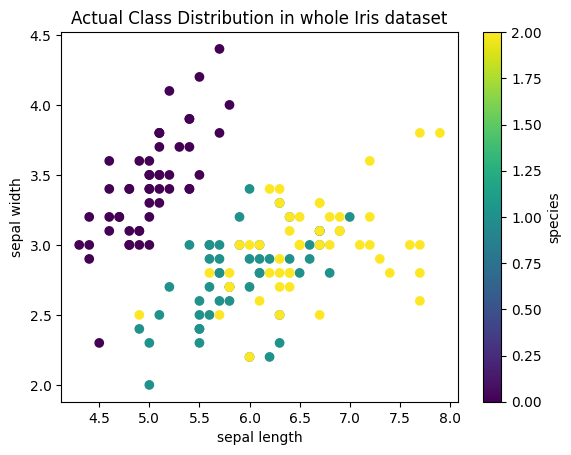

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Class Distribution in whole Iris dataset")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.colorbar(label='species')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
centers=3

Accuracy: 0.6888888888888889


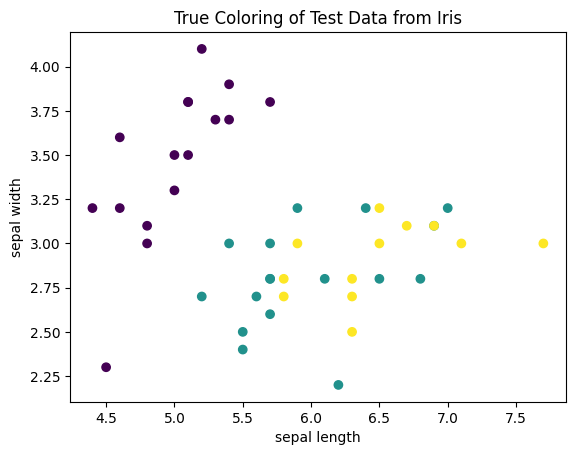

In [ ]:
model = SoftmaxRegression()
model.fit(X_train, y_train, n_classes=centers,epochs=5000)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optional: Plotting the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("True Coloring of Test Data from Iris")
plt.show()


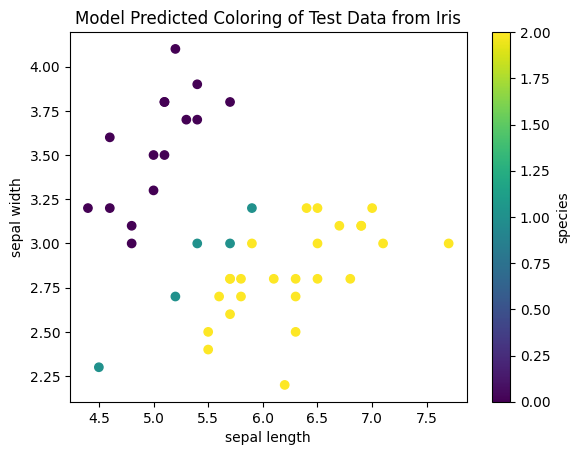

In [ ]:
# Assuming X_test and y_test are already defined from the previous code
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Model Predicted Coloring of Test Data from Iris")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.colorbar(label='species')
plt.show()

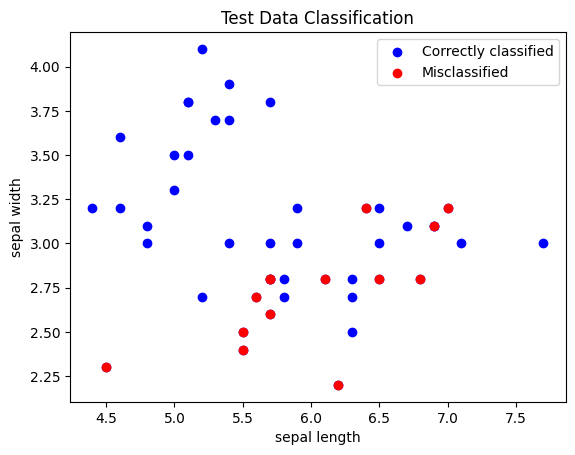

In [ ]:
# Assuming y (true labels) and y_pred (predicted labels) are already defined in the notebook
# Identify the indices where y_pred differs from y
misclassified_indices = [i for i, (pred, true) in enumerate(zip(y_pred, y_test)) if pred != true]


# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', label='Correctly classified')
plt.scatter(X_test[misclassified_indices, 0], X_test[misclassified_indices, 1], c='red', label='Misclassified')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title('Test Data Classification')
plt.legend()
plt.show()